In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [61]:
import numpy as np
import argparse
import cv2

In [106]:

def countCircles(img: np.array):
    # convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # image smoothing
    blur = cv2.GaussianBlur(gray, (11, 11), 0)
    # apply canny edge detector
    canny = cv2.Canny(blur, 30, 150, 3)
    # apply morphological operation (Dilation) to accentuate edges
    dilated = cv2.dilate(canny, (1, 1), iterations=0)

    # retrieves edges
    (cnt, hierarchy) = cv2.findContours(
        dilated.copy(), 
        cv2.RETR_EXTERNAL, 
        cv2.CHAIN_APPROX_NONE
    )

    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    count = 0
    for entry in cnt:
        # approximate contour to polygone
        polygone = cv2.approxPolyDP(entry, .03 * cv2.arcLength(entry, True), True)
        vertex = len(polygone);
        if vertex > 4 and cv2.isContourConvex(polygone):
            cv2.drawContours(rgb, entry, -1, (0, 255, 0), 2)
            count += 1

    fig, axs = plt.subplots(1, 2, figsize = (20,8))
    axs[0].imshow(img)
    axs[0].set_title('Original')
    axs[1].imshow(rgb)
    axs[1].set_title(f'{count} circles detected')

In [108]:
def countCircles1(image_path):
    
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Apply a Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    # Perform Hough Circle Transform
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=20, maxRadius=50)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    num_circles = 0

# Check if circles were found
    if circles is not None:
    # Convert the coordinates and radius to integers
        circles = circles.round().astype(int)

    # Draw the detected circles on the original image
        for (x, y, r) in circles[0]:
            cv2.circle(rgb, (x, y), r, (0, 255, 0), 2)
        # Draw a small circle (of radius 1) to show the center.
            cv2.circle(rgb, (x, y), 25, (0, 0, 255), 3)
    # Count the number of circles
        num_circles = len(circles[0])
        print("Number of circles detected:", num_circles)

    # Display the image with detected circles
        cv2.imshow("Detected Circles", rgb)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
    else:
        print("No circles detected in the image.")

    fig, axs = plt.subplots(1, 2, figsize = (20,8))
    axs[0].imshow(cv2.imread(image_path, cv2.IMREAD_COLOR))
    axs[0].set_title('Original')
    
    axs[1].imshow(rgb)
    axs[1].set_title(f'{num_circles} circles detected')


    

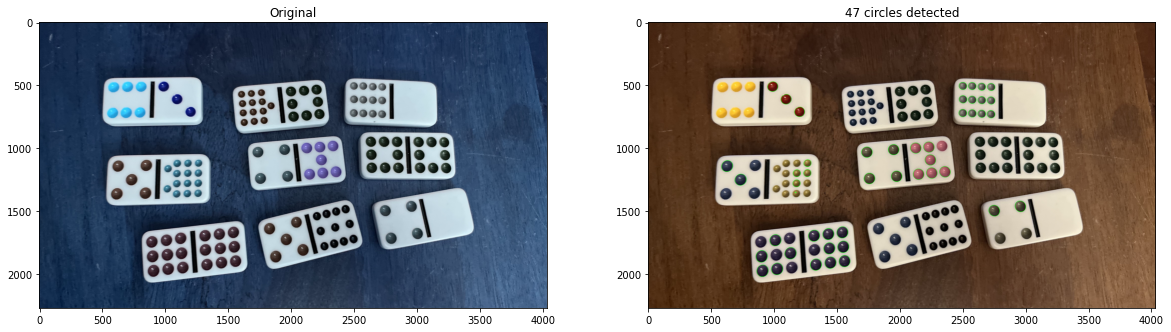

In [109]:
countCircles(cv2.imread('dom_2.jpg'))

Number of circles detected: 121


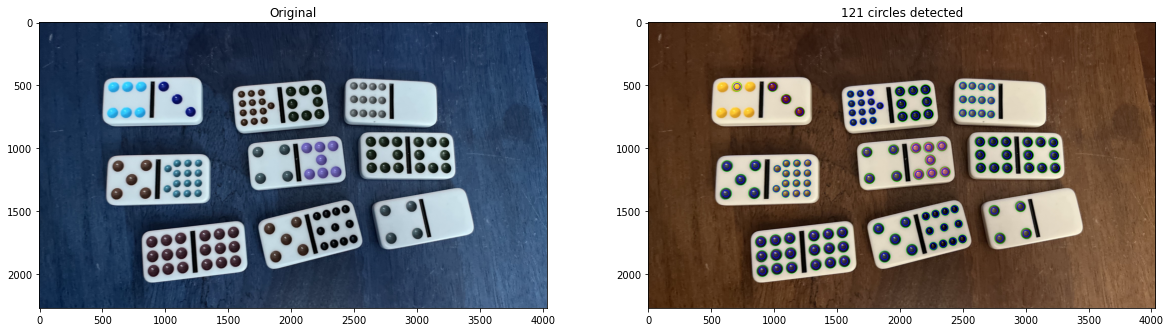

In [110]:
countCircles1('dom_2.jpg')

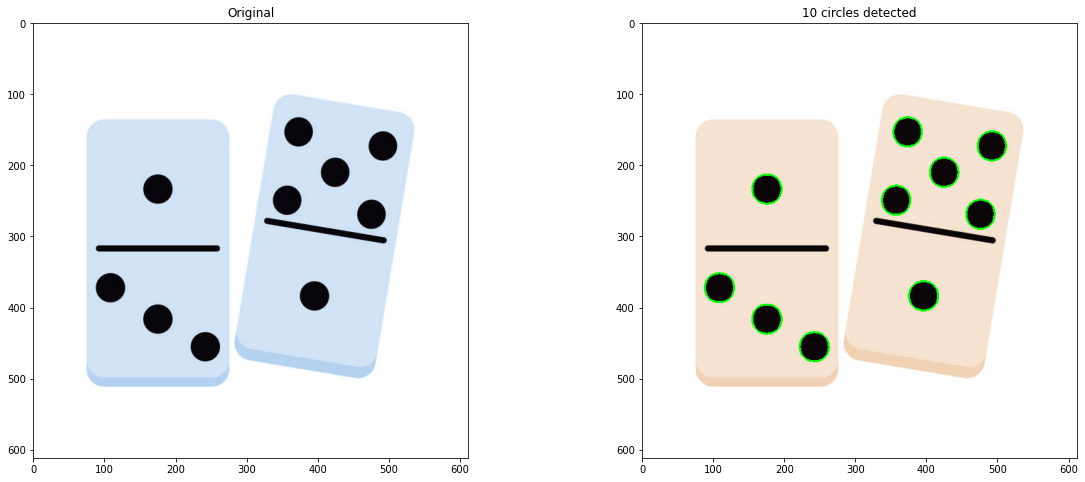

In [111]:
countCircles(cv2.imread('dom_3.jpg'))

Number of circles detected: 10


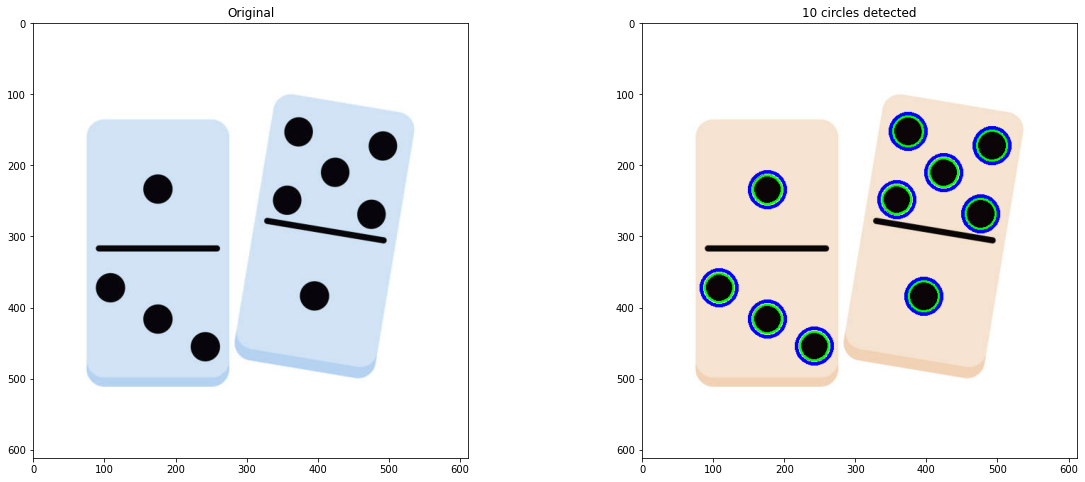

In [112]:
countCircles1('dom_3.jpg')

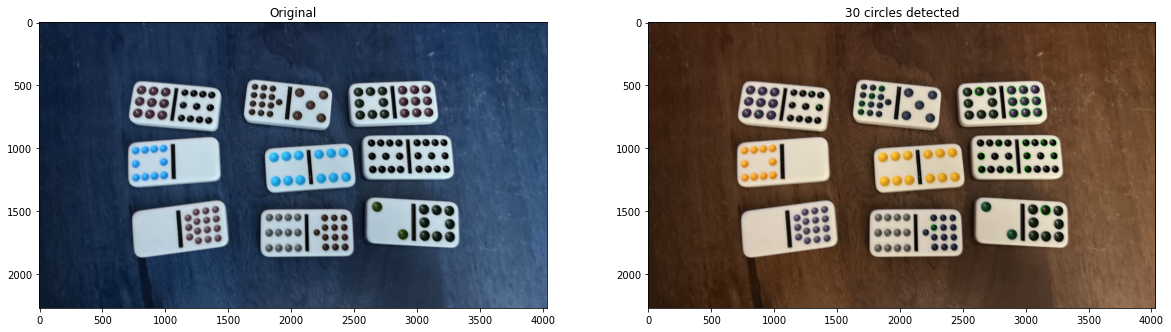

In [117]:
countCircles(cv2.imread('domino1.jpg'))


Number of circles detected: 141


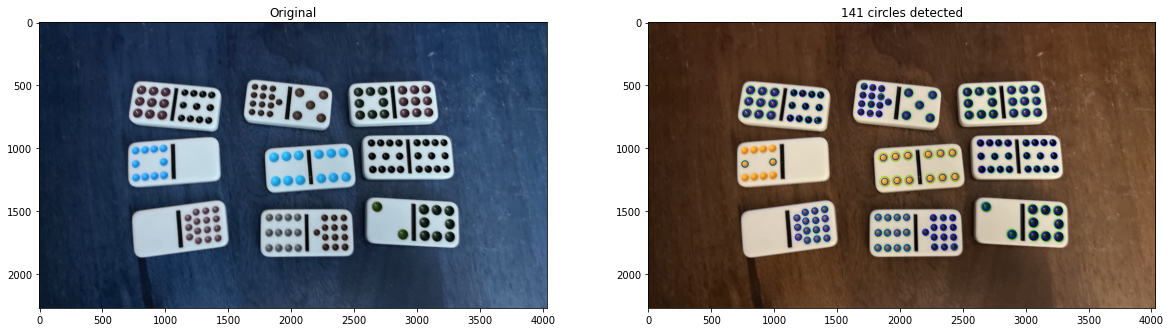

In [118]:
countCircles1('domino1.jpg')

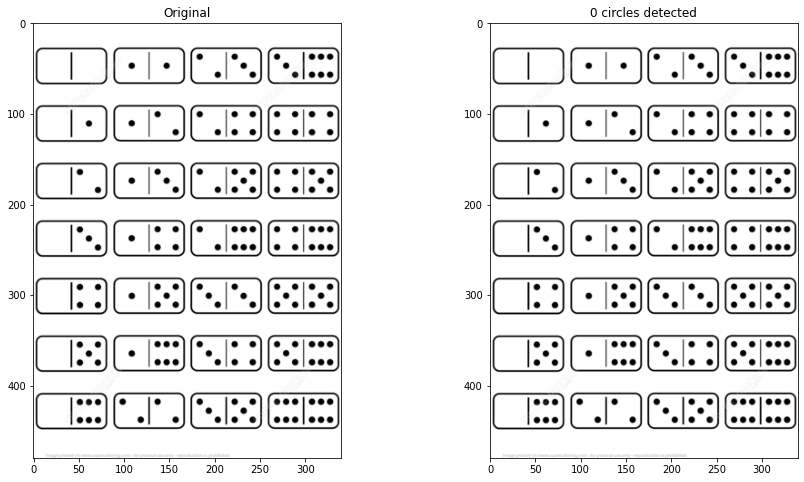

In [99]:
countCircles(cv2.imread('dom5.png'))

No circles detected in the image.


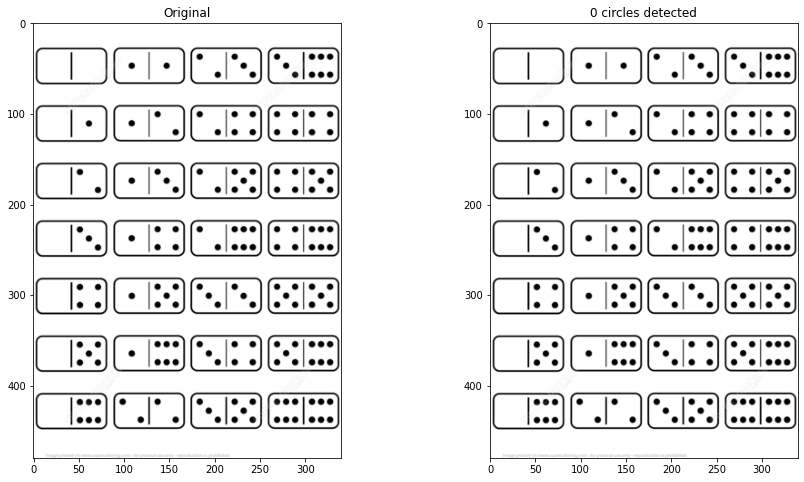

In [100]:
countCircles1('dom5.png')

In [101]:
countCircles(cv2.imread('10.jpeg'))

[ WARN:0@77494.463] global loadsave.cpp:244 findDecoder imread_('10.jpeg'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


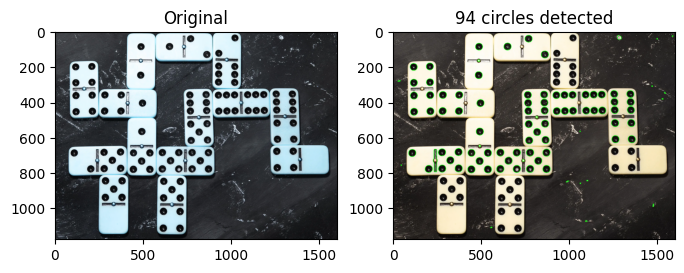

In [ ]:
countCircles(cv2.imread('11.webp'))

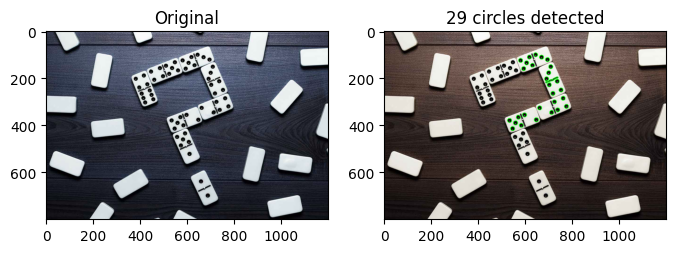

In [ ]:
countCircles(cv2.imread('12.jpeg'))

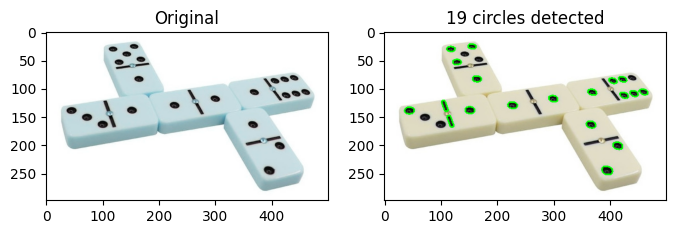

In [ ]:
countCircles(cv2.imread('13.jpeg'))

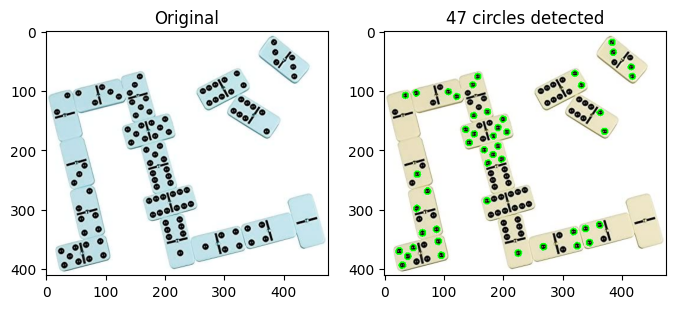

In [ ]:
countCircles(cv2.imread('14.jpg'))